##Query Tag Prediction
The aim of this project is to predict 'tag1' given a customer query.

In [ ]:
#The code is saved in the below repo, s
!git clone https://github.com/asingh86/query_tag_prediction.git

Cloning into 'query_tag_prediction'...
remote: Enumerating objects: 99, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 99 (delta 42), reused 74 (delta 25), pack-reused 0
Unpacking objects: 100% (99/99), done.


In [19]:
#checking directory contents
import os
os.listdir()

['.config', 'query_tag_prediction', 'sample_data']

In [20]:
#changing directory to the project folder and checking directory contents
os.chdir('query_tag_prediction')
os.listdir()

['model',
 'app.py',
 'images',
 '.gitignore',
 '.idea',
 'local_notebook.ipynb',
 '__pycache__',
 'data',
 'configs',
 '.ipynb_checkpoints',
 'utils',
 'requirements.txt',
 'README.md',
 '.git',
 'model_files',
 'transformer.py',
 'colab_requirements.txt']

We need manually create 2 folders in this directory:

1. 'data' - This folder contains raw data and the 'anonymous labeled conversations.json' needs to be manually uploaded in here.
2. 'model_files' - This folder will contain the saved model and history file.

and install the below requirements

In [ ]:
#install colab reqirements file
!pip install -r colab_requirements.txt

     |████████████████████████████████| 8.6 MB 4.4 MB/s 
     |████████████████████████████████| 42 kB 668 kB/s 
     |████████████████████████████████| 1.5 MB 49.6 MB/s 
     |████████████████████████████████| 41 kB 376 kB/s 
     |████████████████████████████████| 636 kB 43.6 MB/s 
     |████████████████████████████████| 22.3 MB 82.0 MB/s 
     |████████████████████████████████| 4.3 MB 46.7 MB/s 
     |████████████████████████████████| 10.3 MB 36.8 MB/s 
     |████████████████████████████████| 428 kB 57.6 MB/s 
     |████████████████████████████████| 392 kB 58.7 MB/s 
     |████████████████████████████████| 56 kB 3.5 MB/s 
     |████████████████████████████████| 296 kB 47.5 MB/s 
     |████████████████████████████████| 68 kB 6.2 MB/s 
     |████████████████████████████████| 77 kB 6.5 MB/s 
     |████████████████████████████████| 112 kB 60.7 MB/s 
     |████████████████████████████████| 56 kB 3.5 MB/s 
  Attempting uninstall: tornado
    Found existing installation: tornado 5.1.1
    

In [21]:
#calling relevant packages
from transformer import Transformer
from app import Executor
from matplotlib import pyplot as plt

Below is some sample data including the original and processed messages. 

There is a seprate module implemented in utils.text_preprocessing which takes a piece of text and perform the following operations:
- converts text to lowercase
- remove manual characters i.e. '\n' etc.
- removes emojis
- remove punctuations
- remove other manual stopwords i.e hey, hi etc.

The above is an initial implementation of text pre-processing and one can build on this framework to add additional processing items/steps.

In [ ]:
#sample data

t= Transformer()
queries = t.read_and_clean_data()
queries[0:10]

[{'original_message': '<p>I was unable to complete an eBay transaction with my card. I tried twice. First failure so far!</p>',
  'processed_message': 'i was unable to complete an ebay transaction with my card i tried twice first failure so far',
  'tag1': 'APP - Outage',
  'tag2': None,
  'tag3': None},
 {'original_message': "<p>Hi, I still haven't received my mondo card and it was expected on Monday.  I was told to contact you by the end of the week if it had not arrived, thanks!</p>",
  'processed_message': 'i still havent received my mondo card and it was expected on monday i was told to contact you by the end of the week if it had not arrived thanks',
  'tag1': 'CARD - Not Arrived',
  'tag2': None,
  'tag3': None},
 {'original_message': "<p>Hey, I'm liking the new app design but ever since this last update, I have to re-sign into the app (via the email magic link) practically every time I launch it. It's getting a little inconvenient!</p>",
  'processed_message': 'im liking the ne

In [ ]:
#total sample in this datset
len(queries)

6869

<BarContainer object of 12 artists>

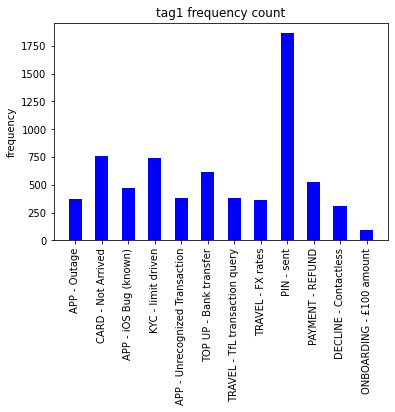

In [ ]:
#Target distribution- The below indicates an imbalanced dataset and further steps can be taken to dela with it i.e 
#oversampling etc.

freq={}
for i in queries:
    freq[i['tag1']] = freq.get(i['tag1'],0) + 1

plt.xticks(rotation=90)
plt.title("tag1 frequency count")
plt.ylabel("frequency")
plt.bar(freq.keys(), freq.values(), width=.5, color='b')

##Sampling
Total sample is divided into training, validation and test set of .8,.1,.1. The dataset is quiet small. However, this is to showcase the methodology used.


##Model
We have used a pre-trained Bert model and fine-tuned it after adding a dropout and dense layer in the end with 12 classes (one for each of the above class). This is a multi-class model with 12 classes. Further details can be found in the config file as well as in 'model' folder.

The model training takes approx 25 mins per epoch on a single TPU colab notebook. Therefore its only been trained on a small no of epochs (further info on model parameters can be found in config file).

##Model Loss
Categorical crossentropy

##Model Training and Evaluation Metric
Accuracy- We are computing the overall accuracy here. However, this can be further enhanced by looking at precision/recall values per class. 

Another way to evaluate the model is by looking at top k predictions i.e. 

In [22]:
#Training and storing the model
execute = Executor()
execute.model_fit()

Epoch 1/5
170/170 [==============================] - 1351s 8s/step - loss: 3.1227 - accuracy: 0.0000e+00 - val_loss: 4.4630 - val_accuracy: 0.0000e+00
Epoch 2/5
170/170 [==============================] - 1345s 8s/step - loss: 2.8941 - accuracy: 0.0000e+00 - val_loss: 3.8593 - val_accuracy: 0.0000e+00
Epoch 3/5
170/170 [==============================] - 1349s 8s/step - loss: 2.8828 - accuracy: 0.0000e+00 - val_loss: 2.8098 - val_accuracy: 0.0000e+00
Epoch 4/5
170/170 [==============================] - 1355s 8s/step - loss: 2.7375 - accuracy: 0.0000e+00 - val_loss: 9.0087 - val_accuracy: 0.0000e+00
Epoch 5/5
170/170 [==============================] - 1361s 8s/step - loss: 3.0031 - accuracy: 0.0000e+00 - val_loss: 4.4855 - val_accuracy: 0.0000e+00


INFO:tensorflow:Assets written to: ./model_files/assets


INFO:tensorflow:Assets written to: ./model_files/assets


In [23]:
# The below perform inference on test datset and provides an overall accuracy score. The overall accuracy score is
#low and this can be due to a couple of factors i.e. small dataset size etc. Also potential change in the learning rate
#and batch size can also help with performance improvements.


execute.perform_inference()

Exception ignored in: <function CapturableResource.__del__ at 0x7f0fe2b00290>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/training/tracking/tracking.py", line 277, in __del__
    self._destroy_resource()
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/eager/def_function.py", line 889, in __call__
    result = self._call(*args, **kwds)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/eager/def_function.py", line 924, in _call
    results = self._stateful_fn(*args, **kwds)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/eager/function.py", line 3022, in __call__
    filtered_flat_args) = self._maybe_define_function(args, kwargs)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/eager/function.py", line 3444, in _maybe_define_function
    graph_function = self._create_graph_function(args, kwargs)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/eager/fun

0.07278020378457059